In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
#todays date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-06
time: 12:17:43


In [3]:
prompt1 = "Simulate pdb  1MBN at two different temperatures: 300K, 400K for 1ns seconds each. Plot RMSD of both over time, and compare the final secondary structures at the end of the simulations."
llm_var = "llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)

In [4]:
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [5]:
result = agent.run(prompt1)



> Entering new AgentExecutor chain...
Thought: First, I need to download the PDB file for 1MBN and then set up and run two simulations at different temperatures. After that, I can compute the RMSD for each simulation and plot them over time. Finally, I will compare the final secondary structures at the end of the simulations.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```
Thought: First, I need to download the PDB file for 1MBN and then set up and run two simulations at different temperatures. After that, I can compute the RMSD for each simulation and plot them over time. Finally, I will compare the final secondary structures at the end of the simulations.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```


2024-08-06 12:17:51.556 
  command:

    streamlit run /opt/anaconda3/envs/llama-mdagent/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


PDB file found with this ID: 1MBN

Observation: Succeeded. Downloaded the PDB file:1MBN_121751
Thought:Thought: Now that I have the PDB file, I need to set up and run two simulations at different temperatures. I will use the SetUpandRunFunction tool to run the simulations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_121751",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 500000,
      "record_interval_steps": 1000,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```

Note: I wil

In [6]:
#print final date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-06
time: 15:13:53


In [7]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_121751: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_121751
 1MBN_121810: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_121819: Initial positions for simulation sim0_121819
 sim0_121819: Basic Simulation of Protein 1MBN_121810
 rec0_121819: Simulation trajectory for protein 1MBN_121810 and simulation sim0_121819
 rec1_121819: Simulation state log for protein 1MBN_121810 and simulation sim0_121819
 rec2_121819: Simulation pdb frames for protein 1MBN_121810 and simulation sim0_121819
 top_sim0_141456: Initial positions for simulation sim0_141456
 sim0_141456: Basic Simulation of Protein 1MBN_121810
 rec0_141457: Simulation trajectory for protein 1MBN_121810 and simulation sim0_141456
 rec1_141457: Simulation state log for protein 1MBN_121810 and simulation sim0_141456
 rec2_141457: Simulation pdb frames for protein 1MBN_1218

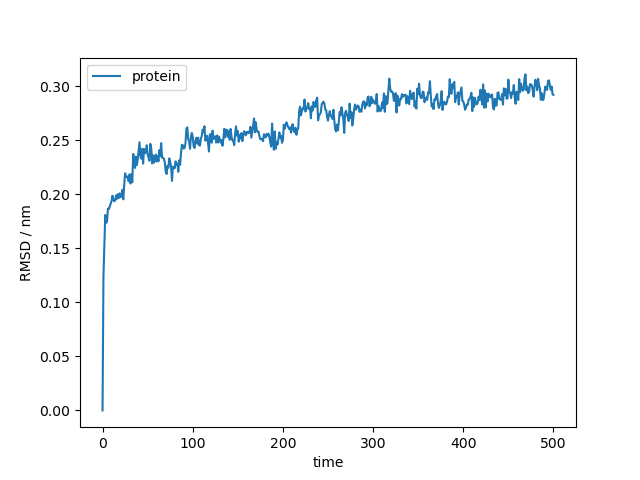

In [9]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'fig0_151330'
rmsd2ID = 'fig0_151333'
path1 = registry.get_mapped_path(rmsd1ID)
path2 = registry.get_mapped_path(rmsd2ID)


Image(filename=path1)



In [12]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec2_121819")
top_path = registry.get_mapped_path("top_sim0_121819")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('At 300 K: ')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))
print()
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))

At 300 K: 
Number of initial sheets:  0
Number of initial helices:  106
Number of initial coils:  47

Number of final sheets:  0
Number of final helices:  93
Number of final coils:  60


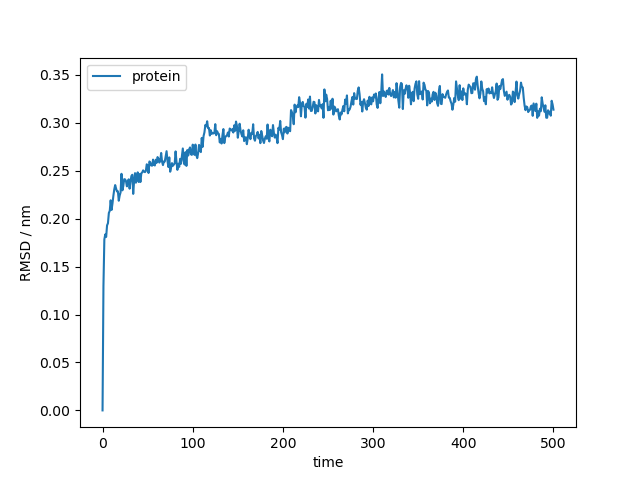

In [10]:
Image(filename=path2)

In [14]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec2_141457")
top_path = registry.get_mapped_path("top_sim0_141456")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('At 400K: ')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))
print()
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))

At 400K: 
Number of initial sheets:  0
Number of initial helices:  107
Number of initial coils:  46

Number of final sheets:  0
Number of final helices:  93
Number of final coils:  60


# Experiment Result:
### Completed without Exception or TimeOut Errors  ✅
### Attempted all necessary steps ✅
### Completed without Hallucination ✅
### Logic make sense  ✅
### Correct Answer   ✅


Note that DSSP tool sums up counts over all frames instead of last frame, which isn't intended. 